# "1. Your First Map"

> "kaggle_exercise_1"

- toc:true
- branch: master
- badges: true
- comments: true
- author: Hyeokju Yeon
- categories: [kaggle, geospatial, excersize]

In [1]:
import geopandas as gpd

### 1) Get the data 

Use the next cell to load the shapefile located at `loans_filepath` to create a GeoDataFrame `world_loans`.  

In [2]:
world_loans = gpd.read_file("./data/kiva_loans/kiva_loans/kiva_loans.shp")

# Uncomment to view the first five rows of the data
world_loans.head()

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
0,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,450,POINT (102.89751 13.66726)
1,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,20275,POINT (102.98962 13.02870)
2,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,9150,POINT (102.98962 13.02870)
3,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,604950,POINT (105.31312 12.09829)
4,9,KREDIT Microfinance Institution,General Financial Inclusion,Sanitation,Cambodia,275,POINT (105.31312 12.09829)


### 2) Plot the data

Run the next code cell without changes to load a GeoDataFrame world containing country boundaries.

In [3]:
# This dataset is provided in GeoPandas
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Use the world and world_loans GeoDataFrames to visualize Kiva loan locations across the world.

<AxesSubplot:>

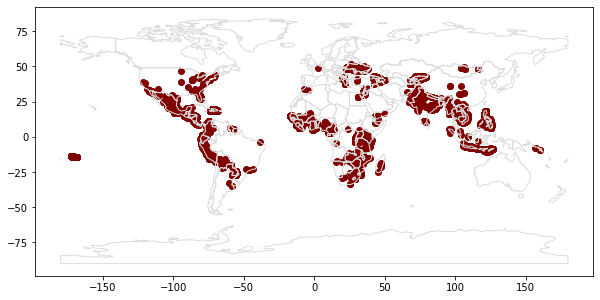

In [10]:
# Define a base map with world boundaries
ax = world.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

# Add Kiva loan to the base map
world_loans.plot(color='maroon', ax=ax)

### 3) Select loans based in the Philippines

Next, you'll focus on loans that are based in the Philippines. Use the next code cell to create a GeoDataFrame PHL_loans which contains all rows from world_loans with loans that are based in the Philippines.

In [11]:
PHL_loans = world_loans.loc[world_loans.country=="Philippines"].copy()

### 4) Understand loans in the Philippines

Run the next code cell without changes to load a GeoDataFrame PHL containing boundaries for all islands in the Philippines.

In [12]:
# Load a KML file containing island boundaries
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
PHL = gpd.read_file("./data/Philippines_AL258.kml", driver='KML')
PHL.head()

,Name,Description,geometry
0,Autonomous Region in Muslim Mindanao,,"MULTIPOLYGON (((119.46690 4.58718, 119.46653 4..."
1,Bicol Region,,"MULTIPOLYGON (((124.04577 11.57862, 124.04594 ..."
2,Cagayan Valley,,"MULTIPOLYGON (((122.51581 17.04436, 122.51568 ..."
3,Calabarzon,,"MULTIPOLYGON (((120.49202 14.05403, 120.49201 ..."
4,Caraga,,"MULTIPOLYGON (((126.45401 8.24400, 126.45407 8..."


Use the PHL and PHL_loans GeoDataFrames to visualize loans in the Philippines.

<AxesSubplot:>

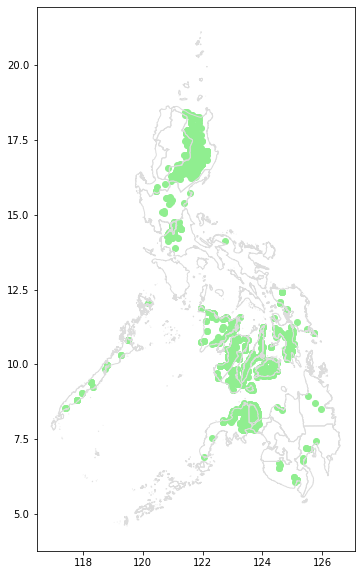

In [13]:
# Define a base map with world boundaries
ax = PHL.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

# Add Kiva loan to the base map
PHL_loans.plot(color='lightgreen', ax=ax)